In [75]:
#Importing the neccessary tools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
#Connecting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
#Setting a path for the data file
folder = '/content/drive/My Drive/Project_4/'

In [5]:
#A function that opens the file path for the dataset
def open_file(fpath):
  data = pd.read_csv(fpath)
  return data

In [81]:
#Opens the file from the given path and turns it into a dataframe
fpath = f'{folder}/ncaa-team-data.csv'
data = open_file(fpath)
data

,school,conf,rk,w,l,wl,srs,sos,pts_for,pts_vs,pts_total,ap_pre,ap_high,ap_final,pts_diff,ncaa_result,ncaa_numeric,season,coaches,year
0,air-force,MWC,1,12.0,21.0,0.364,-2.99,1.08,73.1,75.1,148.2,30.0,30.0,30.0,-2.0,NaN,0.0,2016-17,Dave Pilipovich (12-21),2016.0
1,air-force,MWC,2,14.0,18.0,0.438,-5.51,0.66,68.4,72.8,141.2,30.0,30.0,30.0,-4.4,NaN,0.0,2015-16,Dave Pilipovich (14-18),2015.0
2,air-force,MWC,3,14.0,17.0,0.452,-1.85,-0.71,65.7,65.1,130.8,30.0,30.0,30.0,0.6,NaN,0.0,2014-15,Dave Pilipovich (14-17),2014.0
3,air-force,MWC,4,12.0,18.0,0.400,-4.08,1.71,66.0,69.1,135.1,30.0,30.0,30.0,-3.1,NaN,0.0,2013-14,Dave Pilipovich (12-18),2013.0
4,air-force,MWC,5,18.0,14.0,0.563,4.18,4.28,70.0,67.8,137.8,30.0,30.0,30.0,2.2,NaN,0.0,2012-13,Dave Pilipovich (18-14),2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24024,youngstown-state,OVC,33,19.0,11.0,0.633,-0.49,-2.05,NaN,NaN,NaN,30.0,30.0,30.0,NaN,NaN,0.0,1984-85,Mike Rice (19-11),1984.0
24025,youngstown-state,OVC,34,18.0,11.0,0.621,-4.28,-4.32,NaN,NaN,NaN,30.0,30.0,30.0,NaN,NaN,0.0,1983-84,Mike Rice (18-11),1983.0
24026,youngstown-state,OVC,35,15.0,12.0,0.556,-7.69,-5.78,NaN,NaN,NaN,30.0,30.0,30.0,NaN,NaN,0.0,1982-83,Mike Rice (15-12),1982.0
24027,youngstown-state,OVC,36,8.0,18.0,0.308,-9.51,-6.19,NaN,NaN,NaN,30.0,30.0,30.0,NaN,NaN,0.0,1981-82,Dom Rosselli (8-18),1981.0


# Data Analysis on UMD in the ACC conference. 
### 1. Does UMD improve overtime in the ACC?


In [45]:
#Creating the new dataframe for UMD's basketball team
md = data.loc[data['school'] == 'maryland']
md

#Showing only the stats of when they were in the ACC conference
md_acc = md.loc[md['conf'] == 'ACC']
md_acc

,school,conf,rk,w,l,wl,srs,sos,pts_for,pts_vs,pts_total,ap_pre,ap_high,ap_final,pts_diff,ncaa_result,ncaa_numeric,season,coaches,year
10808,maryland,ACC,4,17.0,15.0,0.531,11.33,8.08,70.9,67.7,138.6,30.0,30.0,30.0,3.2,NaN,0.0,2013-14,Mark Turgeon (17-15),2013.0
10809,maryland,ACC,5,25.0,13.0,0.658,11.37,4.66,70.7,64.0,134.7,30.0,30.0,30.0,6.7,NaN,0.0,2012-13,Mark Turgeon (25-13),2012.0
10810,maryland,ACC,6,17.0,15.0,0.531,3.95,5.98,68.7,70.7,139.4,30.0,30.0,30.0,-2.0,NaN,0.0,2011-12,Mark Turgeon (17-15),2011.0
10811,maryland,ACC,7,19.0,14.0,0.576,15.00,5.76,76.8,67.6,144.4,30.0,30.0,30.0,9.2,NaN,0.0,2010-11,Gary Williams (19-14),2010.0
10812,maryland,ACC,8,24.0,9.0,0.727,17.75,7.95,79.7,68.3,148.0,30.0,19.0,20.0,11.4,Lost Second Round,2.0,2009-10,Gary Williams (24-9),2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10864,maryland,ACC,60,22.0,7.0,0.759,10.20,0.85,NaN,NaN,NaN,30.0,6.0,6.0,NaN,Lost Regional Semifinal,8.0,1957-58,Bud Millikan (22-7),1957.0
10865,maryland,ACC,61,16.0,10.0,0.615,2.48,-0.64,NaN,NaN,NaN,30.0,30.0,30.0,NaN,NaN,0.0,1956-57,Bud Millikan (16-10),1956.0
10866,maryland,ACC,62,14.0,10.0,0.583,5.13,3.67,NaN,NaN,NaN,30.0,30.0,30.0,NaN,NaN,0.0,1955-56,Bud Millikan (14-10),1955.0
10867,maryland,ACC,63,17.0,7.0,0.708,4.81,1.18,NaN,NaN,NaN,30.0,6.0,30.0,NaN,NaN,0.0,1954-55,Bud Millikan (17-7),1954.0


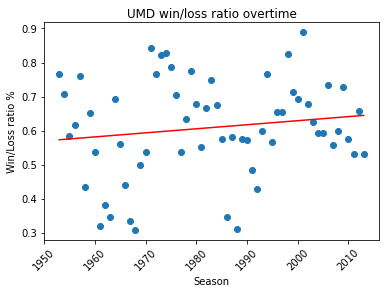

In [80]:
#Narrowing down the columns
md_acc_stats = md_acc[['school', 'conf', 'wl', 'coaches', 'year']]
md_acc_stats

#Plotting a scatterplot of UMD's win/loss ration 
plt.plot(md_acc_stats['year'], md_acc_stats['wl'], 'o')
plt.title('UMD win/loss ratio overtime')
plt.xlabel('Season')
plt.ylabel('Win/Loss ratio %')
plt.xticks(rotation = 45)

#Plotting a linear regression line 
m, b = np.polyfit(md_acc_stats['year'], md_acc_stats['wl'], 1)
plt.plot(md_acc_stats['year'], m*md_acc_stats['year']+b, color='red')
plt.show()

### Based on the plot above, it can be seen that UMD's win/loss ratio in the ACC conference has slighty improved overtime. As the linear regression line has a slight positive increase. The win/loss ratio starts around 0.57 and overtime it rises a little above 0.6. Therefore, *it can be said that UMD does improve over time in the ACC conference*. The cause of their improvement is quite unknown, but may be attributed to many factors such as change in coaches, change in players, change in culture, and much more. Additionally, one interesting trend to notice in this data is that around 1995 and beyond, UMD's win/loss ratio never dips below 0.5. However, around 2010, it does get quite close to 0.5